In [21]:
#import K_mean package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [22]:
Air=pd.read_csv("C:\\Users\\prasa\\Downloads\\EastWestAirlines.csv")
Air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# K_Means Clustering

In [24]:
# Normalizing the given data
def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)

In [25]:
df_Air=norm_func(Air.iloc[:,1:])
df_Air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0


In [26]:
model=KMeans(n_clusters=6, random_state= 50).fit(df_Air)
model.labels_    #getting labels of clusters we have created
# if we dont mention the random state the values will change every time we run the code. 

array([0, 0, 0, ..., 4, 0, 0])

In [27]:
df_Air['ClusterID']=model.labels_   #creating a ClusterId column in normalised data set
df_Air   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0,0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0,0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0,0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0,0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0,0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0,4
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0,4
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0,0


In [29]:
model.cluster_centers_   #Computing the centroids for k=6

array([[2.32416431e+04, 9.70039560e+01, 1.21945055e+00, 5.18021978e-01,
        7.53516484e-01, 7.35040879e+03, 8.25626374e+00, 2.35894066e+02,
        7.41098901e-01, 3.69768855e+03, 2.99780220e-01],
       [3.63319265e+05, 4.49094017e+02, 2.93803419e+00, 5.25641026e-01,
        7.50000000e-01, 4.99647436e+04, 2.01111111e+01, 1.58948718e+03,
        4.73504274e+00, 5.66887155e+03, 7.17948718e-01],
       [1.77279034e+05, 2.53629474e+02, 2.82157895e+00, 5.08421053e-01,
        7.79473684e-01, 3.47572084e+04, 1.73263158e+01, 9.03080000e+02,
        2.45052632e+00, 4.97421239e+03, 4.77894737e-01],
       [7.20621217e+05, 2.47391304e+02, 3.22826087e+00, 5.00000000e-01,
        8.80434783e-01, 6.02981739e+04, 2.16086957e+01, 1.53347826e+03,
        5.52173913e+00, 6.25973889e+03, 8.26086957e-01],
       [8.30817111e+04, 1.53335145e+02, 2.43659420e+00, 5.09057971e-01,
        7.71739130e-01, 2.52736984e+04, 1.48641304e+01, 5.78920290e+02,
        1.72554348e+00, 4.39201606e+03, 4.21195652e-

In [31]:
#Grouping data by Clusters for K=6
df_Air.groupby('ClusterID').agg(['mean']).reset_index()   

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.321407e+04,97.089309,1.218544,0.518038,0.753520,7346.464144,8.250770,236.101628,0.741751,3696.540454,0.300044
1,1,3.633193e+05,449.094017,2.938034,0.525641,0.750000,49964.743590,20.111111,1589.487179,4.735043,5668.871554,0.717949
2,2,1.771839e+05,253.096639,2.821429,0.508403,0.779412,34710.457983,17.323529,901.182773,2.445378,4975.048078,0.476891
3,3,7.206212e+05,247.391304,3.228261,0.500000,0.880435,60298.173913,21.608696,1533.478261,5.521739,6259.738889,0.826087
4,4,8.298586e+04,153.196380,2.435973,0.509050,0.771719,25260.928507,14.862443,578.396380,1.723982,4392.234148,0.420814
5,5,1.288916e+06,1528.000000,2.750000,0.500000,0.750000,39098.000000,24.600000,2754.600000,11.400000,7821.599759,0.800000


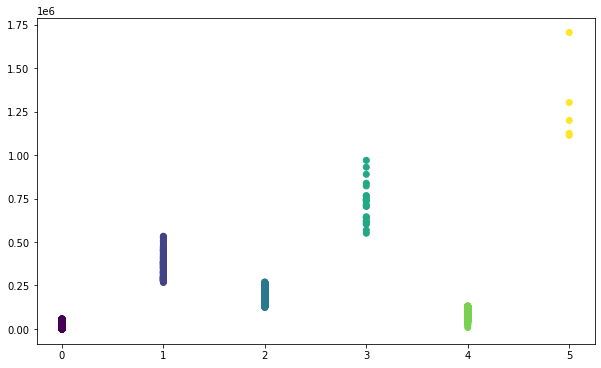

In [33]:
#plotting the Clusters
plt.figure(figsize=(10, 6))  
plt.scatter(df_Air['ClusterID'],df_Air['Balance'], c=model.labels_) 